# Tutorial Step 2: What's in a GWOSC Data File?

In this tutorial, we will use Python to read a GWOSC data file. If you don't have an HDF5 GWOSC data file stored on your computer somewhere, go back to [Step 1](<./01 - Download GWOSC Data.ipynb>).

## Data File Overview

Let's try to read in and plot some data.

In [1]:
#----------------------
# Import needed modules
#----------------------
import numpy as np
import matplotlib.pylab as plt
import h5py

In [2]:
#-------------------------
# Open the File
#-------------------------
fileName = 'H-H1_GWOSC_O3b_4KHZ_R1-1256771584-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

In [3]:
#----------------------
# Explore the file
#----------------------
for key in dataFile.keys():
    print(key) 

meta
quality
strain


## Plot a time series

Let's continue our exploration to make a plot of a few seconds of LIGO data. To store the strain data in a convenient place, use the code below:

In [4]:
#---------------------
# Read in strain data
#---------------------
strain = dataFile['strain']['Strain']
ts = dataFile['strain']['Strain'].attrs['Xspacing']

The code above accesses the `'Strain'` data object that lives inside the group `'strain'`. The "attribute" `'Xspacing'` tells how much time there is between each sample, and we store this as `ts`. The "value" of the data object contains the strain value at each sample - we store this as `strain`. To see all the structure of a GWOSC data file, take a look at the View a File tutorial.

Now, let's use the meta-data to make a vector that will label the time stamp of each sample. In the same way that we indexed `dataFile` as a Python dictionary, we can also index `dataFile['meta']`. To see what meta-data we have to work with, use the code below: 

In [5]:
#-----------------------
# Print out some meta data
#-----------------------
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print(key, meta[key])

Description <HDF5 dataset "Description": shape (), type "|O">
DescriptionURL <HDF5 dataset "DescriptionURL": shape (), type "|O">
Detector <HDF5 dataset "Detector": shape (), type "|O">
Duration <HDF5 dataset "Duration": shape (), type "<i8">
FrameType <HDF5 dataset "FrameType": shape (), type "|O">
GPSstart <HDF5 dataset "GPSstart": shape (), type "<i8">
Observatory <HDF5 dataset "Observatory": shape (), type "|O">
StrainChannel <HDF5 dataset "StrainChannel": shape (), type "|O">
Type <HDF5 dataset "Type": shape (), type "|O">
UTCstart <HDF5 dataset "UTCstart": shape (), type "|O">


In [6]:
#---------------------------
# Create a time vector
#---------------------------
gpsStart = meta['GPSstart'][()]
duration = meta['Duration'][()]
gpsEnd   = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)

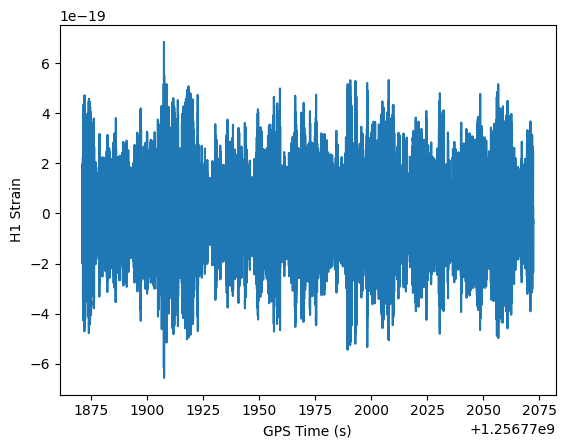

In [7]:
#----------------------
# Plot the time series
#----------------------
numSamples = 2000000
plt.plot(time[0:numSamples], strain[0:numSamples])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()